In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy import distance

In [2]:
a=np.array([1,2])
a=np.append(a,[1,2,3])
a


array([1, 2, 1, 2, 3])

In [3]:
df=pd.read_csv('./data/gps_result.csv',index_col=False)
df['latitude'] = df['latitude'].interpolate(method='nearest')
df['longitude'] = df['longitude'].interpolate(method='nearest')
df=df[df["network_type"]=="wifi"]
df=df.sort_values(["tnv","time"])
df.shape
df['time']=df['time']-3600*5

In [4]:
df[df.tnv==1]

,tnv,time,provider,network_type,accuracy,latitude,longitude,altitude,bearing,speed,travelstate
0,1,1364338963,network,wifi,24.00,43.759135,-72.329240,0.0,0.0,0.0,stationary
2,1,1364341364,network,wifi,23.00,43.759134,-72.329238,0.0,0.0,0.0,stationary
3,1,1364342563,network,wifi,25.00,43.759135,-72.329240,0.0,0.0,0.0,stationary
4,1,1364343763,network,wifi,25.00,43.759135,-72.329240,0.0,0.0,0.0,stationary
5,1,1364344963,network,wifi,23.00,43.759135,-72.329239,0.0,0.0,0.0,stationary
...,...,...,...,...,...,...,...,...,...,...,...
4295,1,1370018640,network,wifi,36.00,43.759190,-72.329181,0.0,0.0,0.0,stationary
4296,1,1370019240,network,wifi,41.66,43.723617,-72.311550,0.0,0.0,0.0,moving
4297,1,1370019807,network,wifi,30.00,43.703863,-72.282590,0.0,0.0,0.0,moving
4299,1,1370020446,network,wifi,38.00,43.742466,-72.229563,0.0,0.0,0.0,moving


In [5]:
dist=np.array([])
def dista(df,i,dist):
    if i==0:
        return np.append(dist,[0]) 
    if df["tnv"].iloc[i]==df["tnv"].iloc[i-1]:
        lat1=df.latitude.iloc[i-1]
        lat2=df.latitude.iloc[i]
        lon1=df.latitude.iloc[i-1]
        lon2=df.latitude.iloc[i]
        d = distance.distance([lat1,lon1], [lat2,lon2]).m
        return np.append(dist,[d])
    else: return np.append(dist,[0])
    
for i in range(0,len(df)):
    dist=dista(df,i,dist)
    
dist.shape

(187613,)

In [6]:
dist

array([0.        , 0.02744446, 0.02744446, ..., 1.92358721, 0.48786631,
       3.1920394 ])

In [7]:
df['distance']=dist
df

,tnv,time,provider,network_type,accuracy,latitude,longitude,altitude,bearing,speed,travelstate,distance
0,1,1364338963,network,wifi,24.0,43.759135,-72.329240,0.0,0.0,0.0,stationary,0.000000
2,1,1364341364,network,wifi,23.0,43.759134,-72.329238,0.0,0.0,0.0,stationary,0.027444
3,1,1364342563,network,wifi,25.0,43.759135,-72.329240,0.0,0.0,0.0,stationary,0.027444
4,1,1364343763,network,wifi,25.0,43.759135,-72.329240,0.0,0.0,0.0,stationary,0.000000
5,1,1364344963,network,wifi,23.0,43.759135,-72.329239,0.0,0.0,0.0,stationary,0.013722
...,...,...,...,...,...,...,...,...,...,...,...,...
202872,60,1370038628,network,wifi,22.0,40.914261,-73.792014,0.0,0.0,0.0,stationary,0.738769
202873,60,1370039227,network,wifi,36.0,40.914236,-73.792047,0.0,0.0,0.0,stationary,3.401125
202874,60,1370039827,network,wifi,39.0,40.914250,-73.792028,0.0,0.0,0.0,stationary,1.923587
202875,60,1370040427,network,wifi,39.0,40.914247,-73.792007,0.0,0.0,0.0,stationary,0.487866


In [8]:
df.latitude.iloc[0]

43.7591346

In [9]:
v=np.array([])
def velocity(df,i,var):
    if i==0:
        return np.append(var,[0]) 
    if df["tnv"].iloc[i]==df["tnv"].iloc[i-1]:
        time=df.time.iloc[i]-df.time.iloc[i-1]
        d = df.distance.iloc[i]/time
        return np.append(var,[d])
    else: return np.append(var,[0])
    
for i in range(0,len(df)):
    v=velocity(df,i,v)
    
v

array([0.00000000e+00, 1.14304291e-05, 2.28894582e-05, ...,
       3.20597869e-03, 8.13110512e-04, 5.31121364e-03])

In [10]:
df['velocity']=v
df

,tnv,time,provider,network_type,accuracy,latitude,longitude,altitude,bearing,speed,travelstate,distance,velocity
0,1,1364338963,network,wifi,24.0,43.759135,-72.329240,0.0,0.0,0.0,stationary,0.000000,0.000000
2,1,1364341364,network,wifi,23.0,43.759134,-72.329238,0.0,0.0,0.0,stationary,0.027444,0.000011
3,1,1364342563,network,wifi,25.0,43.759135,-72.329240,0.0,0.0,0.0,stationary,0.027444,0.000023
4,1,1364343763,network,wifi,25.0,43.759135,-72.329240,0.0,0.0,0.0,stationary,0.000000,0.000000
5,1,1364344963,network,wifi,23.0,43.759135,-72.329239,0.0,0.0,0.0,stationary,0.013722,0.000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202872,60,1370038628,network,wifi,22.0,40.914261,-73.792014,0.0,0.0,0.0,stationary,0.738769,0.001229
202873,60,1370039227,network,wifi,36.0,40.914236,-73.792047,0.0,0.0,0.0,stationary,3.401125,0.005678
202874,60,1370039827,network,wifi,39.0,40.914250,-73.792028,0.0,0.0,0.0,stationary,1.923587,0.003206
202875,60,1370040427,network,wifi,39.0,40.914247,-73.792007,0.0,0.0,0.0,stationary,0.487866,0.000813


In [11]:
a=np.array([])
def accelerate(df,i,var):
    if i==0:
        return np.append(var,[0]) 
    if df["tnv"].iloc[i]==df["tnv"].iloc[i-1]:
        time=df.time.iloc[i]-df.time.iloc[i-1]
        d = df.velocity.iloc[i]/time
        return np.append(var,[d])
    else: return np.append(var,[0])
    
for i in range(0,len(df)):
    a=accelerate(df,i,a)
    
a

array([0.00000000e+00, 4.76069519e-09, 1.90904572e-08, ...,
       5.34329781e-06, 1.35518419e-06, 8.83729391e-06])

In [12]:
df['accelerate']=a
df

,tnv,time,provider,network_type,accuracy,latitude,longitude,altitude,bearing,speed,travelstate,distance,velocity,accelerate
0,1,1364338963,network,wifi,24.0,43.759135,-72.329240,0.0,0.0,0.0,stationary,0.000000,0.000000,0.000000e+00
2,1,1364341364,network,wifi,23.0,43.759134,-72.329238,0.0,0.0,0.0,stationary,0.027444,0.000011,4.760695e-09
3,1,1364342563,network,wifi,25.0,43.759135,-72.329240,0.0,0.0,0.0,stationary,0.027444,0.000023,1.909046e-08
4,1,1364343763,network,wifi,25.0,43.759135,-72.329240,0.0,0.0,0.0,stationary,0.000000,0.000000,0.000000e+00
5,1,1364344963,network,wifi,23.0,43.759135,-72.329239,0.0,0.0,0.0,stationary,0.013722,0.000011,9.529326e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202872,60,1370038628,network,wifi,22.0,40.914261,-73.792014,0.0,0.0,0.0,stationary,0.738769,0.001229,2.045313e-06
202873,60,1370039227,network,wifi,36.0,40.914236,-73.792047,0.0,0.0,0.0,stationary,3.401125,0.005678,9.479141e-06
202874,60,1370039827,network,wifi,39.0,40.914250,-73.792028,0.0,0.0,0.0,stationary,1.923587,0.003206,5.343298e-06
202875,60,1370040427,network,wifi,39.0,40.914247,-73.792007,0.0,0.0,0.0,stationary,0.487866,0.000813,1.355184e-06


In [13]:
from datetime import datetime
def changedate(x):
    day=datetime.fromtimestamp(x).strftime("%d:%m:%Y ")
    return day
df['date']=df['time'].apply(lambda x: changedate(x))

def changedate(x):
    time=datetime.fromtimestamp(x).strftime("%H h %M min %S sec")
    return time
df['time in date']=df['time'].apply(lambda x: changedate(x))
def changedate(x):
    time=datetime.fromtimestamp(x).strftime("%H")
    return time
df['hour in date']=df['time'].apply(lambda x: changedate(x))
def changedate(x):
    time=datetime.fromtimestamp(x).strftime("%M")
    return time
df['min in date']=df['time'].apply(lambda x: changedate(x))
def changedate(x):
    time=datetime.fromtimestamp(x).strftime("%w")
    return time
df['week_date']=df['time'].apply(lambda x: changedate(x))
df

,tnv,time,provider,network_type,accuracy,latitude,longitude,altitude,bearing,speed,travelstate,distance,velocity,accelerate,date,time in date,hour in date,min in date,week_date
0,1,1364338963,network,wifi,24.0,43.759135,-72.329240,0.0,0.0,0.0,stationary,0.000000,0.000000,0.000000e+00,27:03:2013,06 h 02 min 43 sec,06,02,3
2,1,1364341364,network,wifi,23.0,43.759134,-72.329238,0.0,0.0,0.0,stationary,0.027444,0.000011,4.760695e-09,27:03:2013,06 h 42 min 44 sec,06,42,3
3,1,1364342563,network,wifi,25.0,43.759135,-72.329240,0.0,0.0,0.0,stationary,0.027444,0.000023,1.909046e-08,27:03:2013,07 h 02 min 43 sec,07,02,3
4,1,1364343763,network,wifi,25.0,43.759135,-72.329240,0.0,0.0,0.0,stationary,0.000000,0.000000,0.000000e+00,27:03:2013,07 h 22 min 43 sec,07,22,3
5,1,1364344963,network,wifi,23.0,43.759135,-72.329239,0.0,0.0,0.0,stationary,0.013722,0.000011,9.529326e-09,27:03:2013,07 h 42 min 43 sec,07,42,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202872,60,1370038628,network,wifi,22.0,40.914261,-73.792014,0.0,0.0,0.0,stationary,0.738769,0.001229,2.045313e-06,01:06:2013,05 h 17 min 08 sec,05,17,6
202873,60,1370039227,network,wifi,36.0,40.914236,-73.792047,0.0,0.0,0.0,stationary,3.401125,0.005678,9.479141e-06,01:06:2013,05 h 27 min 07 sec,05,27,6
202874,60,1370039827,network,wifi,39.0,40.914250,-73.792028,0.0,0.0,0.0,stationary,1.923587,0.003206,5.343298e-06,01:06:2013,05 h 37 min 07 sec,05,37,6
202875,60,1370040427,network,wifi,39.0,40.914247,-73.792007,0.0,0.0,0.0,stationary,0.487866,0.000813,1.355184e-06,01:06:2013,05 h 47 min 07 sec,05,47,6


In [14]:
time_difference=[0]
def time_inactive(df,i,time_difference):
    hour=int(df['hour in date'].iloc[i])-int(df['hour in date'].iloc[i-1])
    if hour<0:
        hour=24+hour
    minute=int(df['min in date'].iloc[i])-int(df['min in date'].iloc[i-1])
    time=hour*60+minute
    return time_difference.append(time)
for i in range(1,len(df)):
    time_inactive(df,i,time_difference)
print(len(time_difference))
df['time_difference']=time_difference

187613


In [15]:
df.to_csv('working_gps.csv')

In [16]:
#finish create dataframe xva
# 

In [17]:
data=df[['tnv','distance','velocity','accelerate']]

In [18]:
data[data.tnv==1]

,tnv,distance,velocity,accelerate
0,1,0.000000,0.000000,0.000000e+00
2,1,0.027444,0.000011,4.760695e-09
3,1,0.027444,0.000023,1.909046e-08
4,1,0.000000,0.000000,0.000000e+00
5,1,0.013722,0.000011,9.529326e-09
...,...,...,...,...
4295,1,0.000000,0.000000,0.000000e+00
4296,1,4881.950092,8.136583,1.356097e-02
4297,1,2711.284719,4.781807,8.433523e-03
4299,1,5298.167032,8.291341,1.297549e-02


In [19]:
data.groupby('tnv').describe()

distance                                                                 \
       count         mean           std  min       25%       50%        75%   
tnv                                                                           
1     3595.0  1853.107569  34074.314167  0.0  0.000000  0.329334   5.695563   
2     5110.0    29.127698    110.717480  0.0  0.864755  2.841339   6.423898   
3     6273.0    88.638523   1753.082542  0.0  0.960840  2.374640   5.037530   
4     3351.0     7.972034     41.060843  0.0  0.878488  1.949146   3.692398   
5     3544.0    57.964153    126.923383  0.0  1.249107  3.685557  18.781245   
6     5294.0    64.500057   1894.590934  0.0  0.974580  2.498180   5.833752   
8     2993.0    39.727605    143.668984  0.0  1.002034  2.237418   4.159126   
9     6055.0    27.035677     87.043341  0.0  1.496170  3.692395   8.242610   
10    4755.0    62.402133   1160.705462  0.0  1.111832  2.621736   5.771883   
11    4430.0    35.317565    104.956462  0.0  1.592271  3.719877   8.438370   
13    5812.0   732.798809  19080.706342  0.0  1.249576  3.206329   9.052560   
14    5857.0   189.509713   1342.569564  0.0  0.782398  2.100121   4.639483   
15    3694.0   140.218092   4343.532032  0.0  1.801586  4.351228  11.224684   
16    1700.0   277.945105   6897.866040  0.0  1.413827  3.946352  10.613882   
17    5795.0    23.224944     93.498398  0.0  0.988308  2.319778   4.728767   
18    6346.0    18.768076     75.290908  0.0  1.427551  3.486518   6.794593   
19    3412.0   133.025411   4344.145364  0.0  0.974562  2.306010   4.450729   
20    4451.0    33.551567    123.616435  0.0  1.290267  3.006048   6.547418   
21    2560.0    14.259638     59.175402  0.0  1.413816  3.314919   6.935249   
23    3527.0   528.584618  21076.723244  0.0  1.180477  2.676663   5.579790   
24    2076.0    14.516073     64.048119  0.0  1.304006  2.992347   6.084215   
25    2121.0    51.787787    533.140534  0.0  1.098104  2.415829   4.982650   
26    1768.0   584.102673  13504.992751  0.0  1.204500  3.445366   9.677205   
28    4410.0    21.582055     74.787335  0.0  1.811898  5.161139  10.857640   
31    3795.0  1326.862869  22748.238073  0.0  2.248493  6.561336  19.079958   
32    3896.0   608.046258   7770.128094  0.0  0.919795  3.308520  11.960789   
33    3722.0   137.194558   4306.746471  0.0  1.756992  4.371891   9.526190   
34    2754.0    25.549159     98.914042  0.0  1.221660  3.033560   6.478916   
35    1876.0   140.129412    770.806305  0.0  0.233410  2.601046   8.372610   
36    4155.0    62.814565    541.509575  0.0  0.947116  2.100136   4.035555   
37    4710.0  1331.629374  31758.814400  0.0  0.851292  2.155026   4.694388   
40    1200.0   156.769595   1928.953716  0.0  1.630500  5.347215  11.464096   
42    2976.0    28.646748     96.034664  0.0  1.660904  3.829686   8.472664   
43    2782.0   204.822296   1093.843489  0.0  1.276888  3.075514   6.315395   
44    4159.0   203.837771   5679.634595  0.0  1.825604  5.078726  13.877300   
45    3824.0    85.035475    384.830631  0.0  1.729653  4.824982  10.738041   
46    1868.0    79.144886    300.496433  0.0  0.892193  4.138215  10.956900   
47    3685.0   204.389459   4209.793828  0.0  1.290287  2.951189   9.800556   
48    3203.0    96.538889    532.424830  0.0  0.096098  1.358902   4.530312   
50    3359.0   397.506448   7983.260225  0.0  1.070646  2.951141  11.797701   
51    2739.0   159.928117   7783.923778  0.0  0.754945  1.688332   3.136463   
52    5882.0    43.161540    247.662215  0.0  0.000000  0.082364   1.825595   
53    4391.0    43.423665    124.258999  0.0  1.400071  3.870798  10.953488   
54    3653.0    13.122334     50.802177  0.0  1.180458  2.594283   5.133659   
55     847.0  1234.626366  16366.004018  0.0  1.756991  4.845407  84.616887   
57    3313.0   626.617679  11573.547160  0.0  0.192157  1.935298   5.586286   
58    4749.0   260.003074   4643.352570  0.0  1.070655  2.635446   7.755325   
59    5710.0    41.648106    454.867321  0.0  0.768672

In [20]:
data[data.tnv==60].sort_values('distance',ascending=False)

,tnv,distance,velocity,accelerate
200634,60,1.947670e+06,34.785420,0.000621
200333,60,1.530250e+06,18.676393,0.000228
202862,60,3.856523e+05,15.303661,0.000607
200322,60,1.922844e+05,4.458459,0.000103
200309,60,1.735249e+05,44.734451,0.011532
...,...,...,...,...
201065,60,0.000000e+00,0.000000,0.000000
202788,60,0.000000e+00,0.000000,0.000000
201077,60,0.000000e+00,0.000000,0.000000
200111,60,0.000000e+00,0.000000,0.000000


In [21]:
df.iloc[200633:200635,:]

,tnv,time,provider,network_type,accuracy,latitude,longitude,altitude,bearing,speed,travelstate,distance,velocity,accelerate,date,time in date,hour in date,min in date,week_date,time_difference


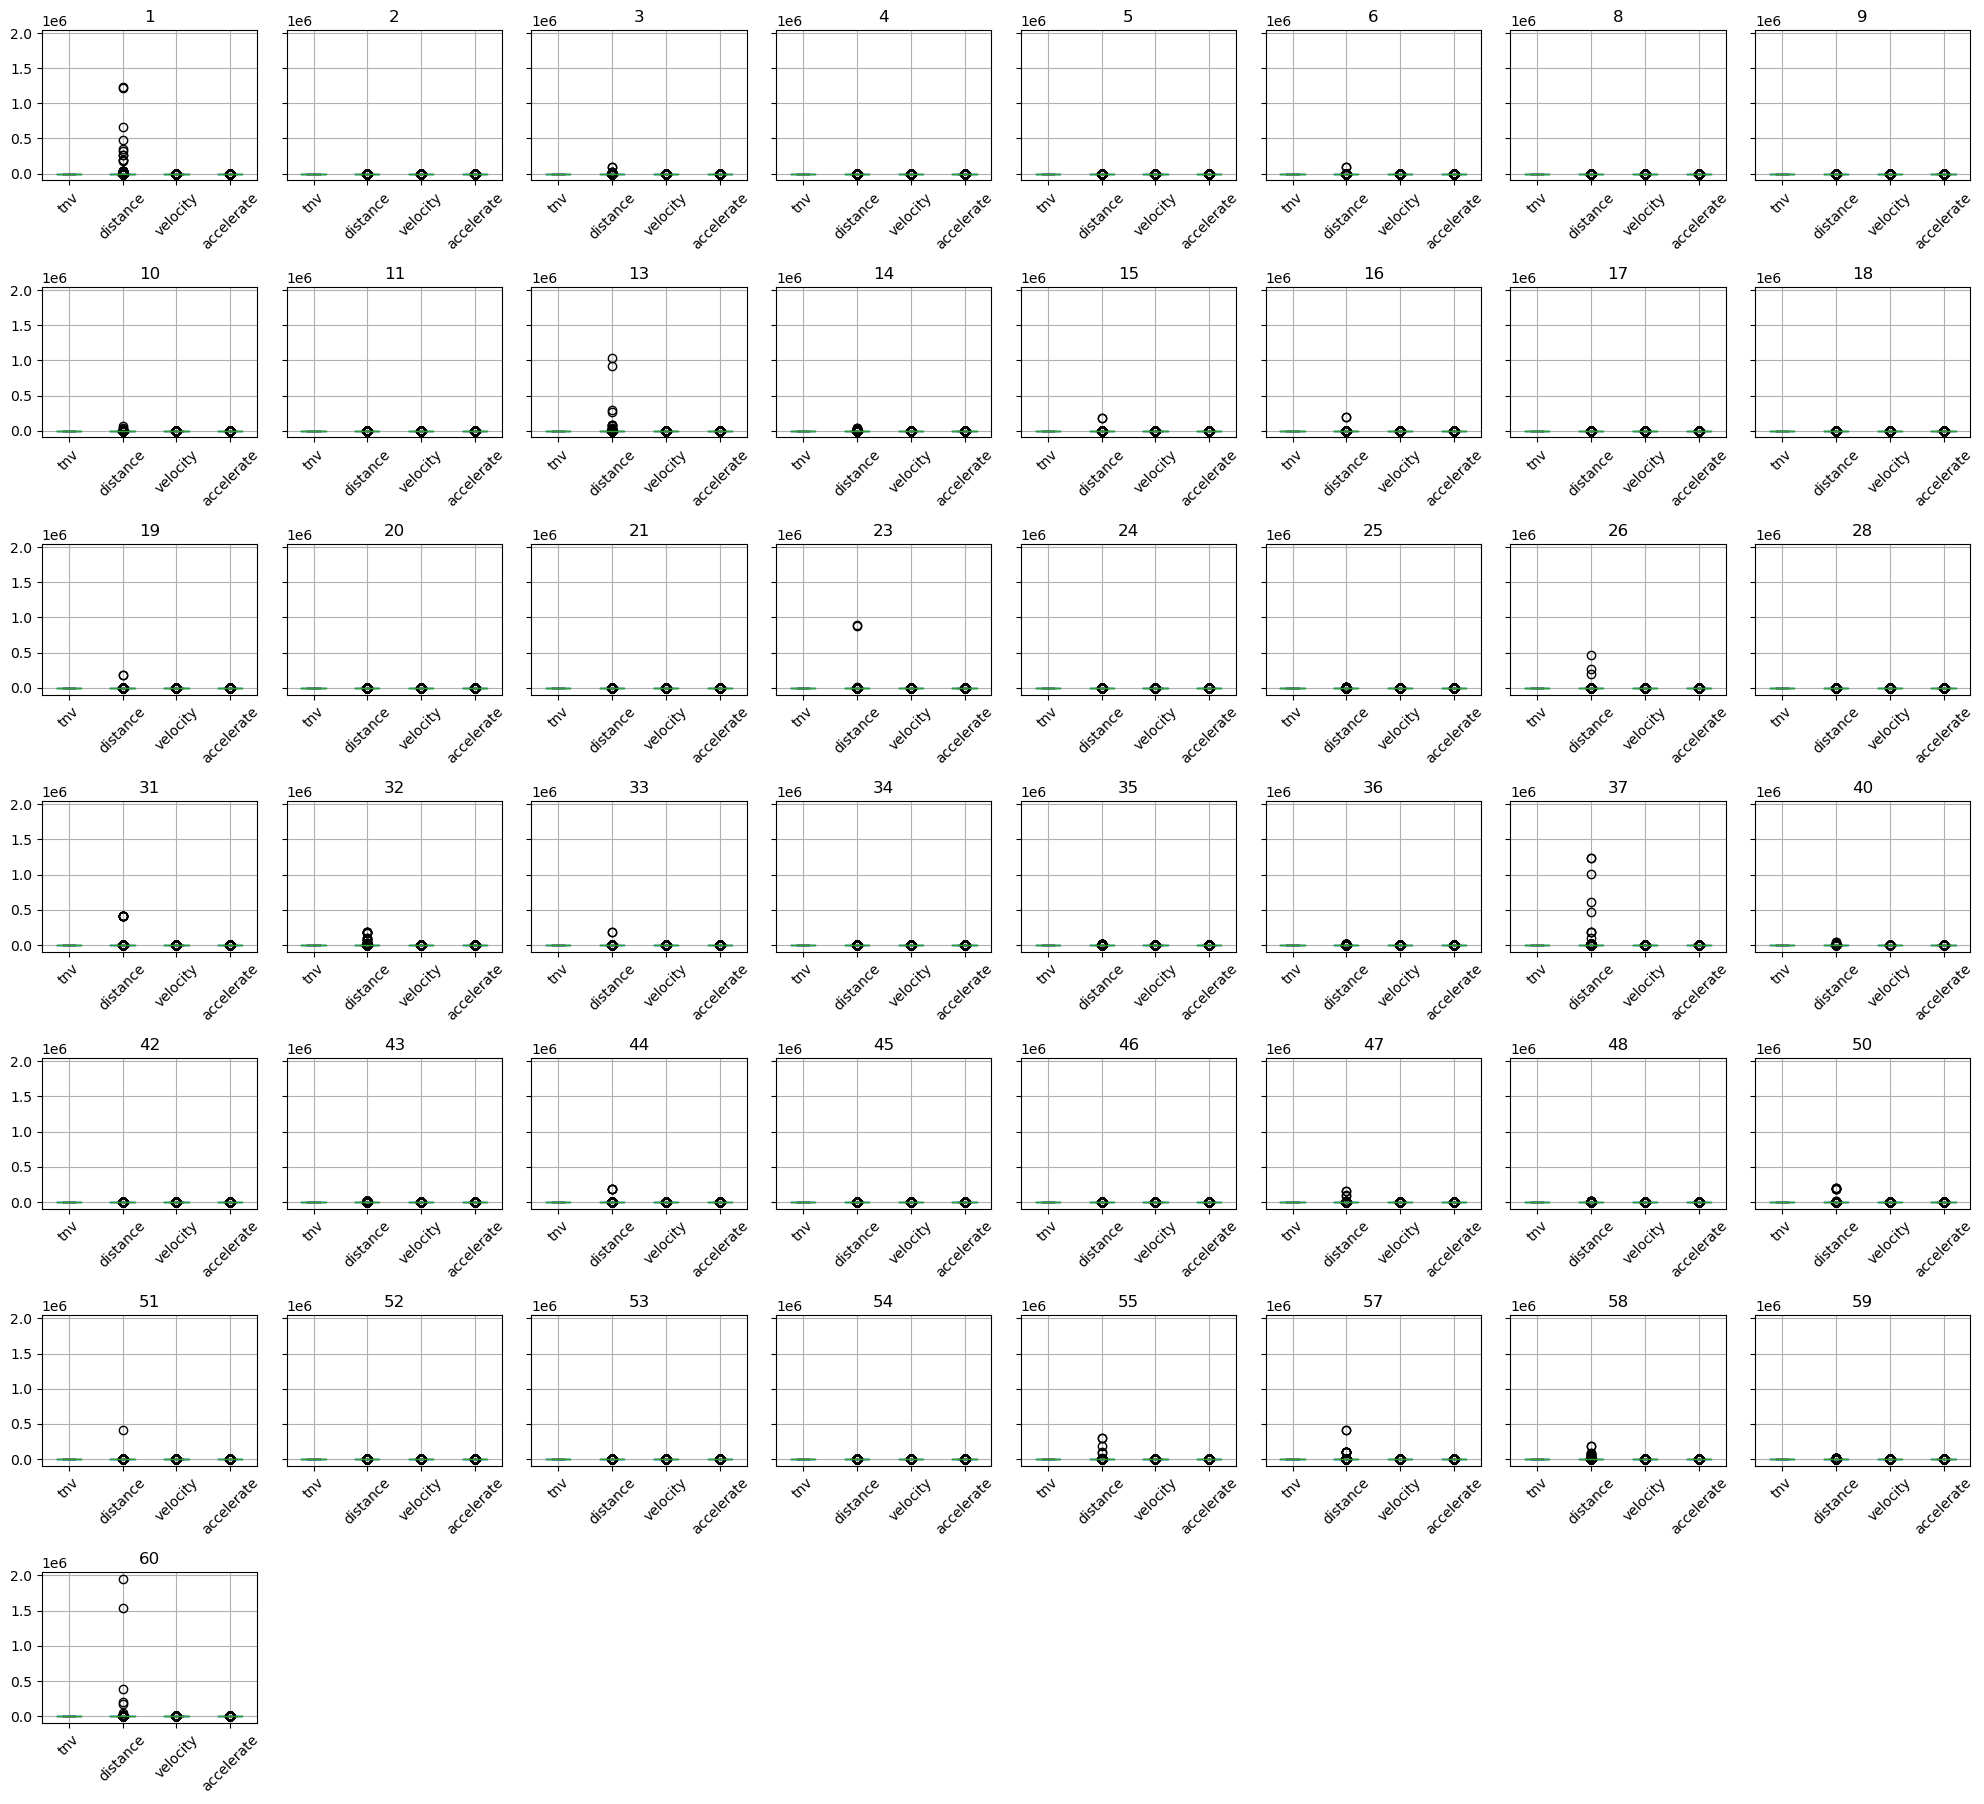

In [22]:

groupdata=data.groupby('tnv')
groupdata.boxplot(rot=45,figsize=(20,20),layout=(8,8))
plt.tight_layout()



In [23]:
data

,tnv,distance,velocity,accelerate
0,1,0.000000,0.000000,0.000000e+00
2,1,0.027444,0.000011,4.760695e-09
3,1,0.027444,0.000023,1.909046e-08
4,1,0.000000,0.000000,0.000000e+00
5,1,0.013722,0.000011,9.529326e-09
...,...,...,...,...
202872,60,0.738769,0.001229,2.045313e-06
202873,60,3.401125,0.005678,9.479141e-06
202874,60,1.923587,0.003206,5.343298e-06
202875,60,0.487866,0.000813,1.355184e-06


In [24]:
data[data['velocity']>20]

,tnv,distance,velocity,accelerate
2430,1,1.232702e+06,26.298769,0.000561
2499,1,3.525300e+05,20.976439,0.001248
2585,1,1.224223e+06,42.500372,0.001475
3504,1,4.812354e+05,21.540459,0.000964
3590,1,6.623705e+05,26.077577,0.001027
...,...,...,...,...
185794,58,1.843501e+05,21.536222,0.002516
200309,60,1.735249e+05,44.734451,0.011532
200325,60,3.891640e+04,21.608219,0.011998
200634,60,1.947670e+06,34.785420,0.000621


In [25]:
data[data['velocity']>20].index.shape

(142,)

In [26]:
data=data.drop(data[data['velocity']>10].index)
data=data.drop(data[data['distance']>2000].index)
data=data.drop(data[data['accelerate']>1].index)

In [27]:
data.describe()

,tnv,distance,velocity,accelerate
count,185928.000000,185928.000000,185928.000000,1.859280e+05
mean,28.820000,30.499155,0.029384,6.859512e-04
std,18.788606,123.220017,0.151729,1.945074e-02
min,1.000000,0.000000,0.000000,0.000000e+00
25%,13.000000,0.974566,0.000949,8.578851e-07
50%,26.000000,2.704094,0.002722,2.630862e-06
75%,47.000000,6.547546,0.006817,7.673482e-06
max,60.000000,1999.475472,9.783504,9.971015e-01


In [28]:
data.groupby('tnv').describe()

distance                                                             \
       count       mean         std  min       25%       50%        75%   
tnv                                                                       
1     3453.0  42.114487  181.438359  0.0  0.000000  0.260722   4.515945   
2     5103.0  29.160074  110.789459  0.0  0.864755  2.841339   6.423899   
3     6253.0  30.778086  109.441706  0.0  0.960837  2.360938   4.996351   
4     3349.0   7.975795   41.072817  0.0  0.878488  1.949146   3.692398   
5     3531.0  58.116603  127.102663  0.0  1.242242  3.678694  19.107071   
6     5278.0  27.781116  100.986636  0.0  0.974569  2.484491   5.830256   
8     2992.0  39.730557  143.692908  0.0  1.002034  2.237418   4.148845   
9     6054.0  27.038402   87.050272  0.0  1.496169  3.692380   8.235823   
10    4739.0  35.300623  118.375947  0.0  1.111825  2.621711   5.737574   
11    4421.0  35.375739  105.053860  0.0  1.592271  3.733601   8.469239   
13    5656.0  25.101238  121.031319  0.0  1.218329  3.034684   8.197767   
14    5716.0  14.622626  111.271438  0.0  0.754945  2.017763   4.282599   
15    3680.0  39.283025  108.982582  0.0  1.811868  4.351240  11.217873   
16    1694.0  41.413929  128.030459  0.0  1.413818  3.960076  10.600149   
17    5787.0  23.249638   93.560096  0.0  0.988308  2.319778   4.735563   
18    6337.0  18.787213   75.342166  0.0  1.427551  3.486518   6.808319   
19    3407.0  27.889100  107.188123  0.0  0.971205  2.306006   4.447297   
20    4447.0  33.579681  123.668465  0.0  1.290267  3.006048   6.547419   
21    2560.0  14.259638   59.175402  0.0  1.413816  3.314919   6.935249   
23    3520.0  24.072604   77.114062  0.0  1.180476  2.676661   5.545493   
24    2076.0  14.516073   64.048119  0.0  1.304006  2.992347   6.084215   
25    2113.0  22.946160   82.850725  0.0  1.098104  2.402103   4.900313   
26    1760.0  61.608026  183.641709  0.0  1.204500  3.445366   9.584617   
28    4403.0  21.610178   74.843394  0.0  1.811900  5.161152  10.871361   
31    3767.0  44.830685  126.171927  0.0  2.251115  6.547583  18.887789   
32    3707.0  28.570118  131.570422  0.0  0.864883  3.061410   9.836328   
33    3708.0  36.352814  119.145694  0.0  1.756993  4.378753   9.512387   
34    2745.0  25.550237   99.034603  0.0  1.221660  3.033560   6.478918   
35    1840.0  58.232055  248.748028  0.0  0.219607  2.504979   8.074100   
36    4113.0  18.561056   93.586013  0.0  0.933394  2.086409   3.953197   
37    4552.0   7.168380   65.104446  0.0  0.810100  2.038610   4.282930   
40    1183.0   9.040828   26.872512  0.0  1.530953  5.202258  11.135463   
42    2969.0  28.707760   96.139540  0.0  1.674614  3.843384   8.482959   
43    2701.0  18.934128   96.993630  0.0  1.249428  2.938214   5.957158   
44    4147.0  27.681903   83.767377  0.0  1.818626  5.065021  13.760673   
45    3697.0  20.579343  126.973860  0.0  1.647289  4.612030  10.103373   
46    1856.0  72.634230  276.882052  0.0  0.892152  4.104031  10.908773   
47    3568.0  47.655111  127.652842  0.0  1.249108  2.827650   7.635344   
48    3124.0  15.581685   79.502836  0.0  0.096098  1.235378   4.393030   
50    3347.0  54.528954  138.653602  0.0  1.056941  2.896316  11.337912   
51    2737.0  11.204444   62.764085  0.0  0.754945  1.674616   3.129592   
52    5873.0  39.772409  231.786193  0.0  0.000000  0.082364   1.811869   
53    4391.0  43.423665  124.258999  0.0  1.400071  3.870798  10.953488   
54    3648.0  13.115433   50.829222  0.0  1.177019  2.594283   5.123357   
55     839.0  82.954168  174.449126  0.0  1.743264  4.708147  71.343113   
57    3271.0  52.638476  234.840541  0.0  0.178432  1.921572   5.476481   
58    4722.0  46.196916  154.177452  0.0  1.070647  2.621720   7.470506   
59    5683.0  17.764885   90.278543  0.0  0.754947  1.605979   2.937431   
60    5411.0  41.405631  116.542477  0.0  0.947132  2.381765   6.587626   

                 velocity            ...                     accelerate  \
             max    count   

In [29]:
visualdf=pd.DataFrame()
visualdf['tnv']=data['tnv']
visualdf['distance']=data['distance']
visualdf['velocity']=data['velocity']*200
visualdf['accelerate']=data['accelerate']*1400


In [30]:
data

,tnv,distance,velocity,accelerate
0,1,0.000000,0.000000,0.000000e+00
2,1,0.027444,0.000011,4.760695e-09
3,1,0.027444,0.000023,1.909046e-08
4,1,0.000000,0.000000,0.000000e+00
5,1,0.013722,0.000011,9.529326e-09
...,...,...,...,...
202872,60,0.738769,0.001229,2.045313e-06
202873,60,3.401125,0.005678,9.479141e-06
202874,60,1.923587,0.003206,5.343298e-06
202875,60,0.487866,0.000813,1.355184e-06


/var/folders/qq/ckqvfttx4vs_68cbq08jts2c0000gn/T/ipykernel_36028/3884068141.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  groupvisualdf.boxplot(rot=45,layout=(15,4), ax=ax)


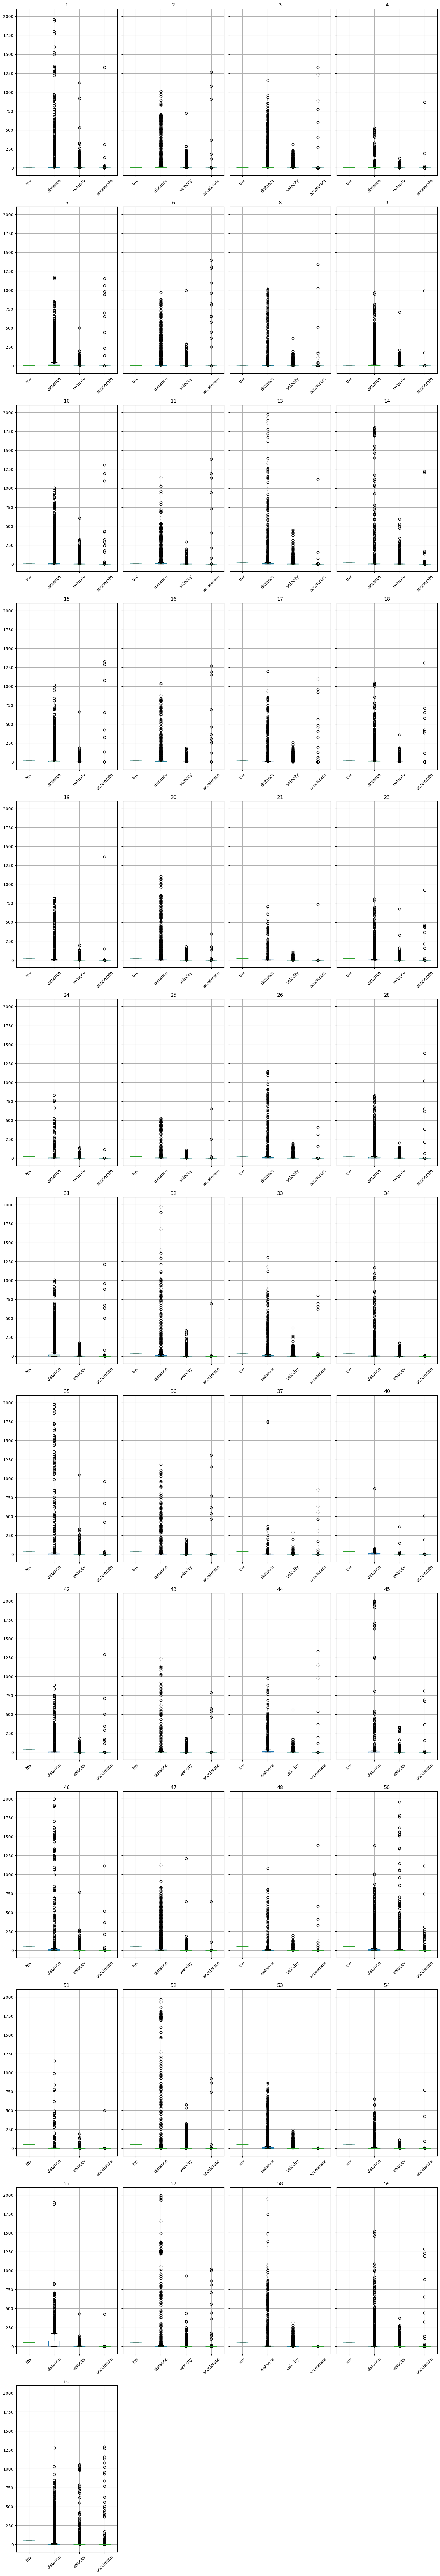

In [31]:
groupvisualdf=visualdf.groupby('tnv')
fig,ax=plt.subplots(figsize=(15,100))
groupvisualdf.boxplot(rot=45,layout=(15,4), ax=ax)
# ax.set_yscale('log')
plt.tight_layout()

In [32]:
visualdata=pd.DataFrame()
visualdata['tnv']=data['tnv']/50
visualdata['distance']=data['distance']/2000*6
visualdata['velocity']=data['velocity']
visualdata['accelerate']=data['accelerate']*6
# visualdata['accelerate']=visualdata['accelerate']
visualdata.describe()


,tnv,distance,velocity,accelerate
count,185928.000000,185928.000000,185928.000000,185928.000000
mean,0.576400,0.091497,0.029384,0.004116
std,0.375772,0.369660,0.151729,0.116704
min,0.020000,0.000000,0.000000,0.000000
25%,0.260000,0.002924,0.000949,0.000005
50%,0.520000,0.008112,0.002722,0.000016
75%,0.940000,0.019643,0.006817,0.000046
max,1.200000,5.998426,9.783504,5.982609


/var/folders/qq/ckqvfttx4vs_68cbq08jts2c0000gn/T/ipykernel_36028/3967147926.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  groupvisualdata.boxplot(rot=45,layout=(15,4), ax=ax)


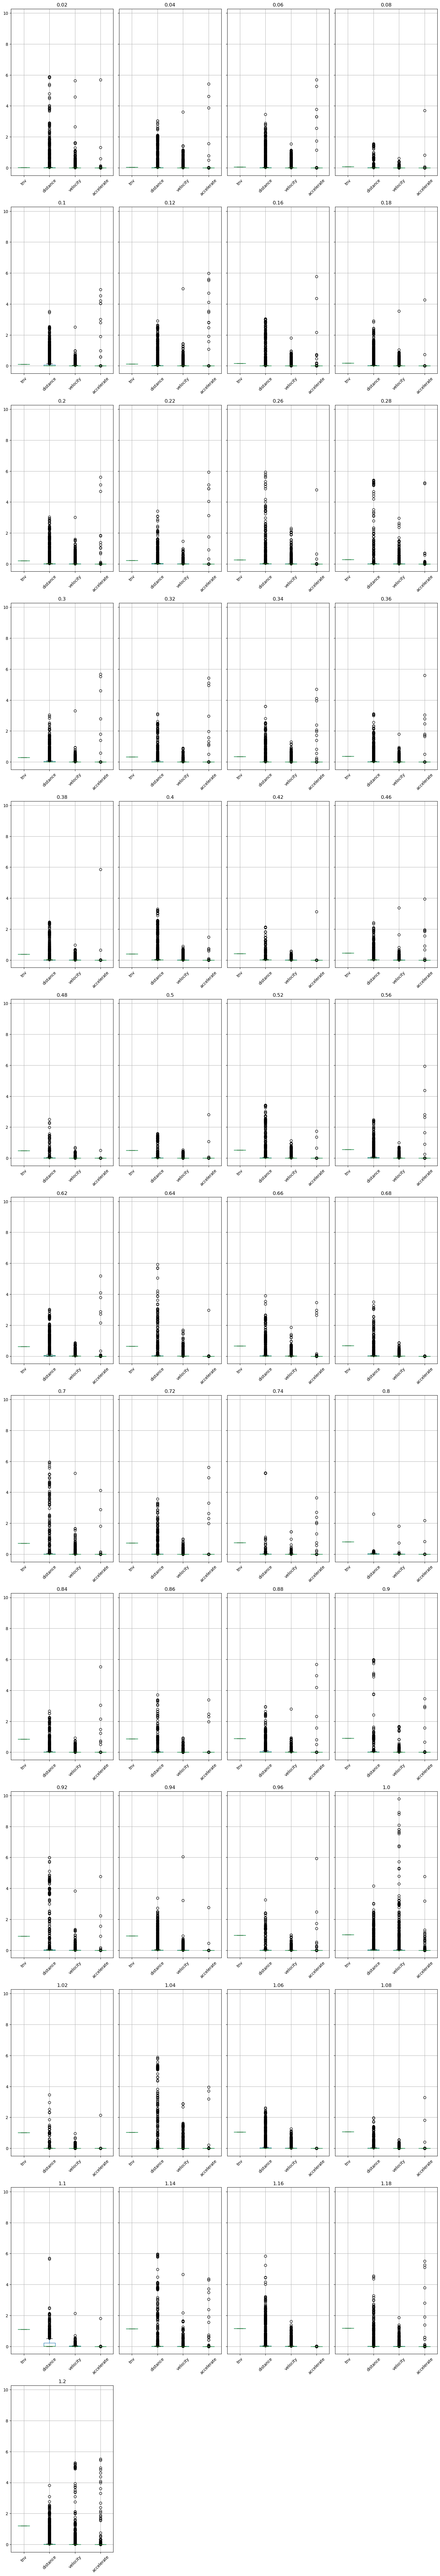

In [33]:
groupvisualdata=visualdata.groupby('tnv')
fig,ax=plt.subplots(figsize=(15,100))
groupvisualdata.boxplot(rot=45,layout=(15,4), ax=ax)
# ax.set_yscale('log')
plt.tight_layout()

In [34]:
visualdata.describe()

,tnv,distance,velocity,accelerate
count,185928.000000,185928.000000,185928.000000,185928.000000
mean,0.576400,0.091497,0.029384,0.004116
std,0.375772,0.369660,0.151729,0.116704
min,0.020000,0.000000,0.000000,0.000000
25%,0.260000,0.002924,0.000949,0.000005
50%,0.520000,0.008112,0.002722,0.000016
75%,0.940000,0.019643,0.006817,0.000046
max,1.200000,5.998426,9.783504,5.982609


In [35]:
data

,tnv,distance,velocity,accelerate
0,1,0.000000,0.000000,0.000000e+00
2,1,0.027444,0.000011,4.760695e-09
3,1,0.027444,0.000023,1.909046e-08
4,1,0.000000,0.000000,0.000000e+00
5,1,0.013722,0.000011,9.529326e-09
...,...,...,...,...
202872,60,0.738769,0.001229,2.045313e-06
202873,60,3.401125,0.005678,9.479141e-06
202874,60,1.923587,0.003206,5.343298e-06
202875,60,0.487866,0.000813,1.355184e-06
